In [132]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import ndimage
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import fcluster
import sklearn.utils

First, we load the data:

In [133]:
data = pd.read_csv(r"C:\Users\h.rahnavard\Downloads\customer.csv")
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [134]:
data = data.drop(["CustomerID"], axis=1)
data = data.reset_index(drop=True)
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [135]:
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


# We will start by using KMeans model:

In [136]:
k_means = KMeans(init= 'k-means++', n_clusters = 4, n_init= 'auto')
x = data[['Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
x = scaler.fit_transform(x)
model = k_means.fit(x)

In [137]:
labels = k_means.labels_
labels

array([3, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 3, 1, 3, 0, 1, 0, 3,
       0, 3, 0, 3, 1, 3, 1, 1, 0, 1, 0, 3, 0, 1, 1, 1, 1, 1, 0, 3, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 0, 3, 0, 1, 0, 3,
       1, 0, 3, 1, 0, 1, 0, 0, 0, 3, 1, 3, 1, 1, 0, 3, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 3, 0, 1, 1, 3, 1, 1, 0, 3, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 3, 1, 1, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 3, 0, 3, 2, 3,
       1, 1, 2, 1, 2, 3, 2, 1, 2, 3, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 2, 3, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3,
       2, 3], dtype=int32)

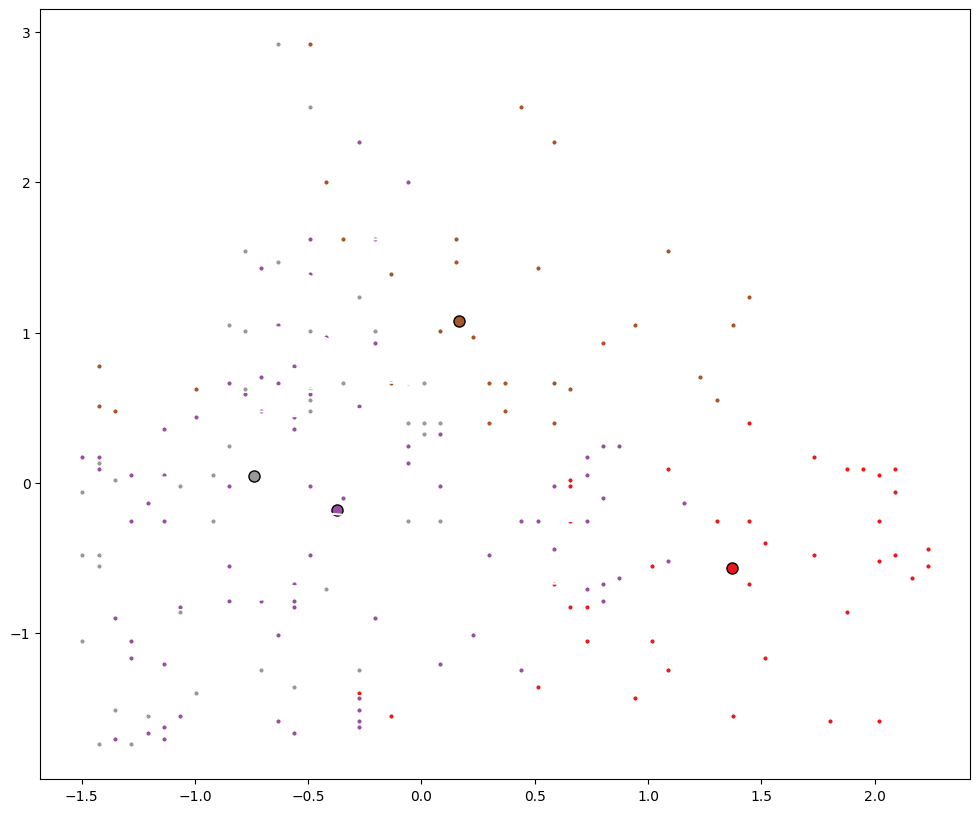

In [138]:
fig = plt.figure(figsize=(12,10))
colors = plt.cm.Set1(np.linspace(0, 1, len(set(labels))))
ax1 = fig.add_subplot(1, 1, 1)
for k, col in zip(range(4), colors):
    members = (labels == k)
    cluster_center = model.cluster_centers_[k]
    ax1.plot(x[members,1], x[members,2], 'w', markerfacecolor=col, marker= '.', markersize=8)
    ax1.plot(cluster_center[1], cluster_center[2], 'o', markerfacecolor=col, markeredgecolor= 'k', markersize = 8)


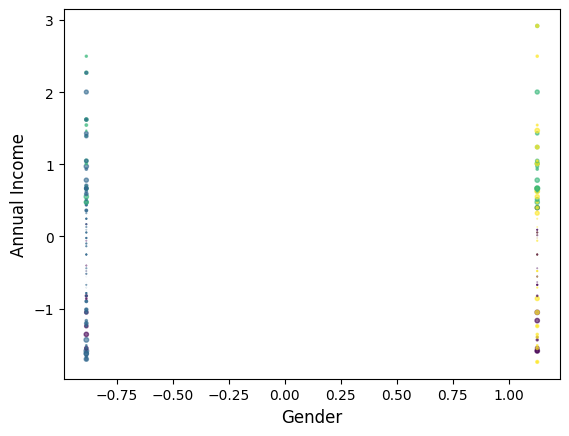

In [139]:
area = np.pi*(x[:,3]) ** 2
plt.scatter(x[:,0],x[:,2], s=area, c=labels.astype(float), alpha=0.6)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)
plt.show()

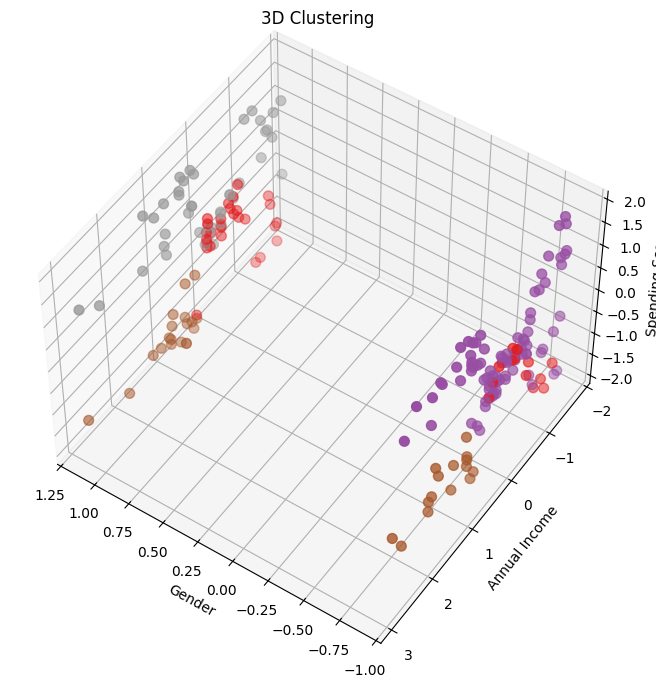

In [140]:
fig = plt.figure(figsize=(10,8))
ax2 = fig.add_subplot(111, projection='3d', elev=50, azim=124)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Annual Income')
ax2.set_zlabel('Spending Score')

ax2.scatter(x[:,0], x[:,2], x[:,3], c=labels.astype(float), cmap='Set1', s=50)
plt.title("3D Clustering")
plt.show()

# Now we can see that the clusters do not actually look much like circles or spheres. So another model would fit our data more. Let's try hierarchical first.

In [141]:
length = x.shape[0]
d1 = np.zeros([length, length])
for i in range(length):
    for j in range(i+1, length):
        d =scipy.spatial.distance.euclidean(x[i],x[j])
        d1[i,j]=d
        d1[j,i]=d
d1

array([[0.        , 1.63681098, 2.38878538, ..., 4.54611614, 4.81867651,
        5.02250496],
       [1.63681098, 0.        , 3.54154808, ..., 4.3182849 , 5.31878915,
        4.70189264],
       [2.38878538, 3.54154808, 0.        , ..., 5.42195122, 5.13299938,
        5.90251765],
       ...,
       [4.54611614, 4.3182849 , 5.42195122, ..., 0.        , 2.21418015,
        0.5647686 ],
       [4.81867651, 5.31878915, 5.13299938, ..., 2.21418015, 0.        ,
        2.5274803 ],
       [5.02250496, 4.70189264, 5.90251765, ..., 0.5647686 , 2.5274803 ,
        0.        ]], shape=(200, 200))

In [142]:
from scipy.spatial.distance import squareform
z1 = hierarchy.linkage(squareform(d1), 'average')

In [143]:
clusters = fcluster(z1, t=4 , criterion='maxclust')
clusters

array([2, 2, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 2, 2, 1, 2, 4, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 4, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 4, 2, 1, 1, 4, 2,
       1, 1, 2, 1, 4, 1, 1, 1, 4, 2, 1, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 1,
       1, 1, 1, 2, 4, 1, 1, 2, 1, 1, 4, 2, 1, 1, 4, 2, 4, 1, 1, 4, 4, 4,
       4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2, 3, 2, 3, 2,
       1, 1, 3, 1, 1, 2, 3, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 3, 2, 1, 1,
       1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1,
       3, 2, 3, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2,
       3, 2], dtype=int32)

In [144]:
clusters = fcluster(z1, t=3 , criterion='distance')
clusters

array([2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 2], dtype=int32)

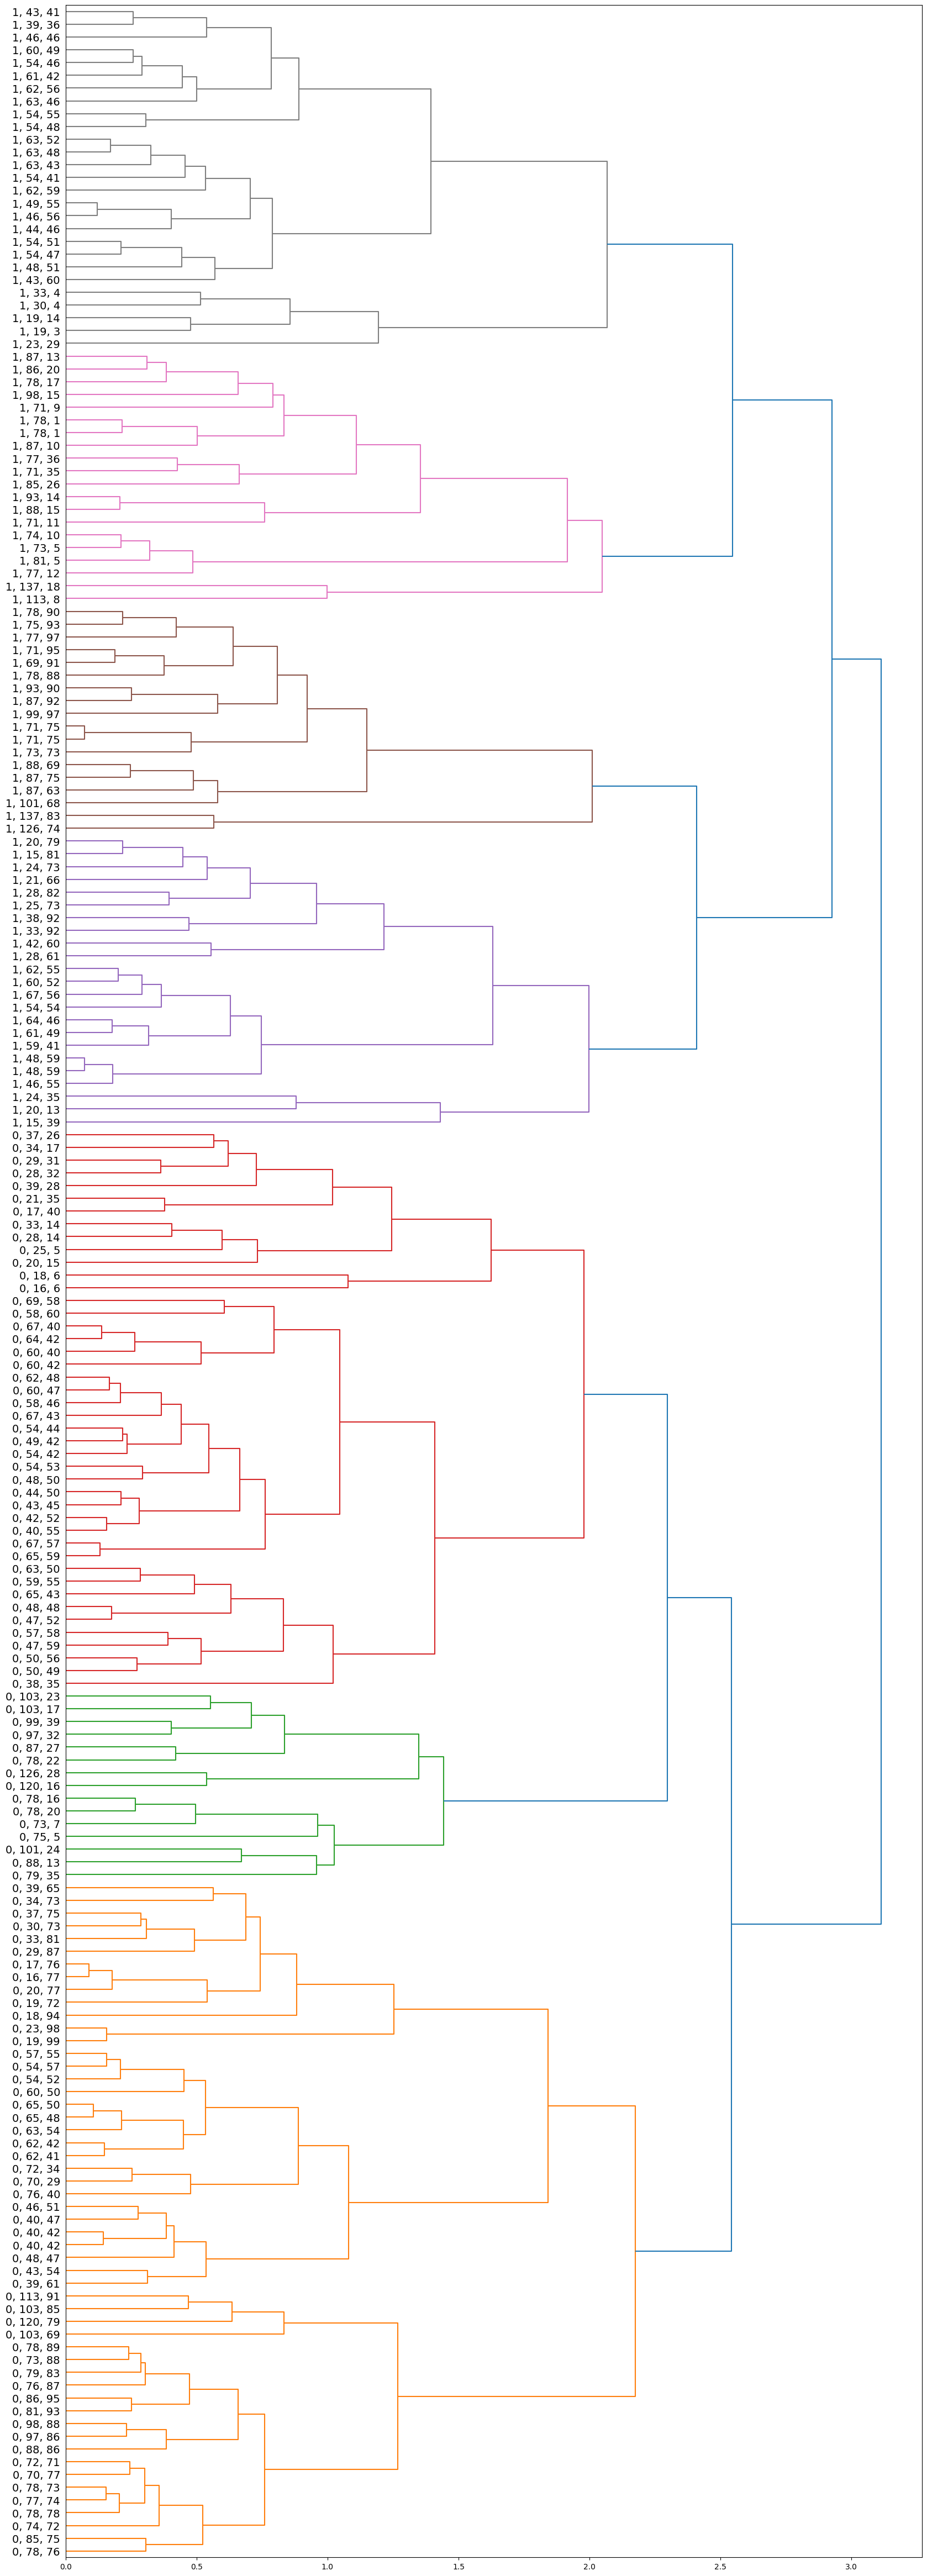

In [145]:
fig = plt.figure(figsize=(20,60))
def leaves(id):
    return f"{data['Gender'][id]}, {data['Annual Income (k$)'][id]}, {data['Spending Score (1-100)'][id]}"
dendro1 = hierarchy.dendrogram(z1, leaf_label_func=leaves, leaf_rotation=0,leaf_font_size=14, orientation='right')

In [146]:
from sklearn.metrics.pairwise import euclidean_distances
d2 = euclidean_distances(x,x)
d2 = (d2 + d2.T)
print(d2)

[[ 0.          3.27362196  4.77757077 ...  9.09223228  9.63735301
  10.04500993]
 [ 3.27362196  0.          7.08309616 ...  8.63656979 10.6375783
   9.40378527]
 [ 4.77757077  7.08309616  0.         ... 10.84390245 10.26599877
  11.80503529]
 ...
 [ 9.09223228  8.63656979 10.84390245 ...  0.          4.42836029
   1.12953721]
 [ 9.63735301 10.6375783  10.26599877 ...  4.42836029  0.
   5.05496061]
 [10.04500993  9.40378527 11.80503529 ...  1.12953721  5.05496061
   0.        ]]


In [147]:
z2 = hierarchy.linkage(squareform(d2), 'average')

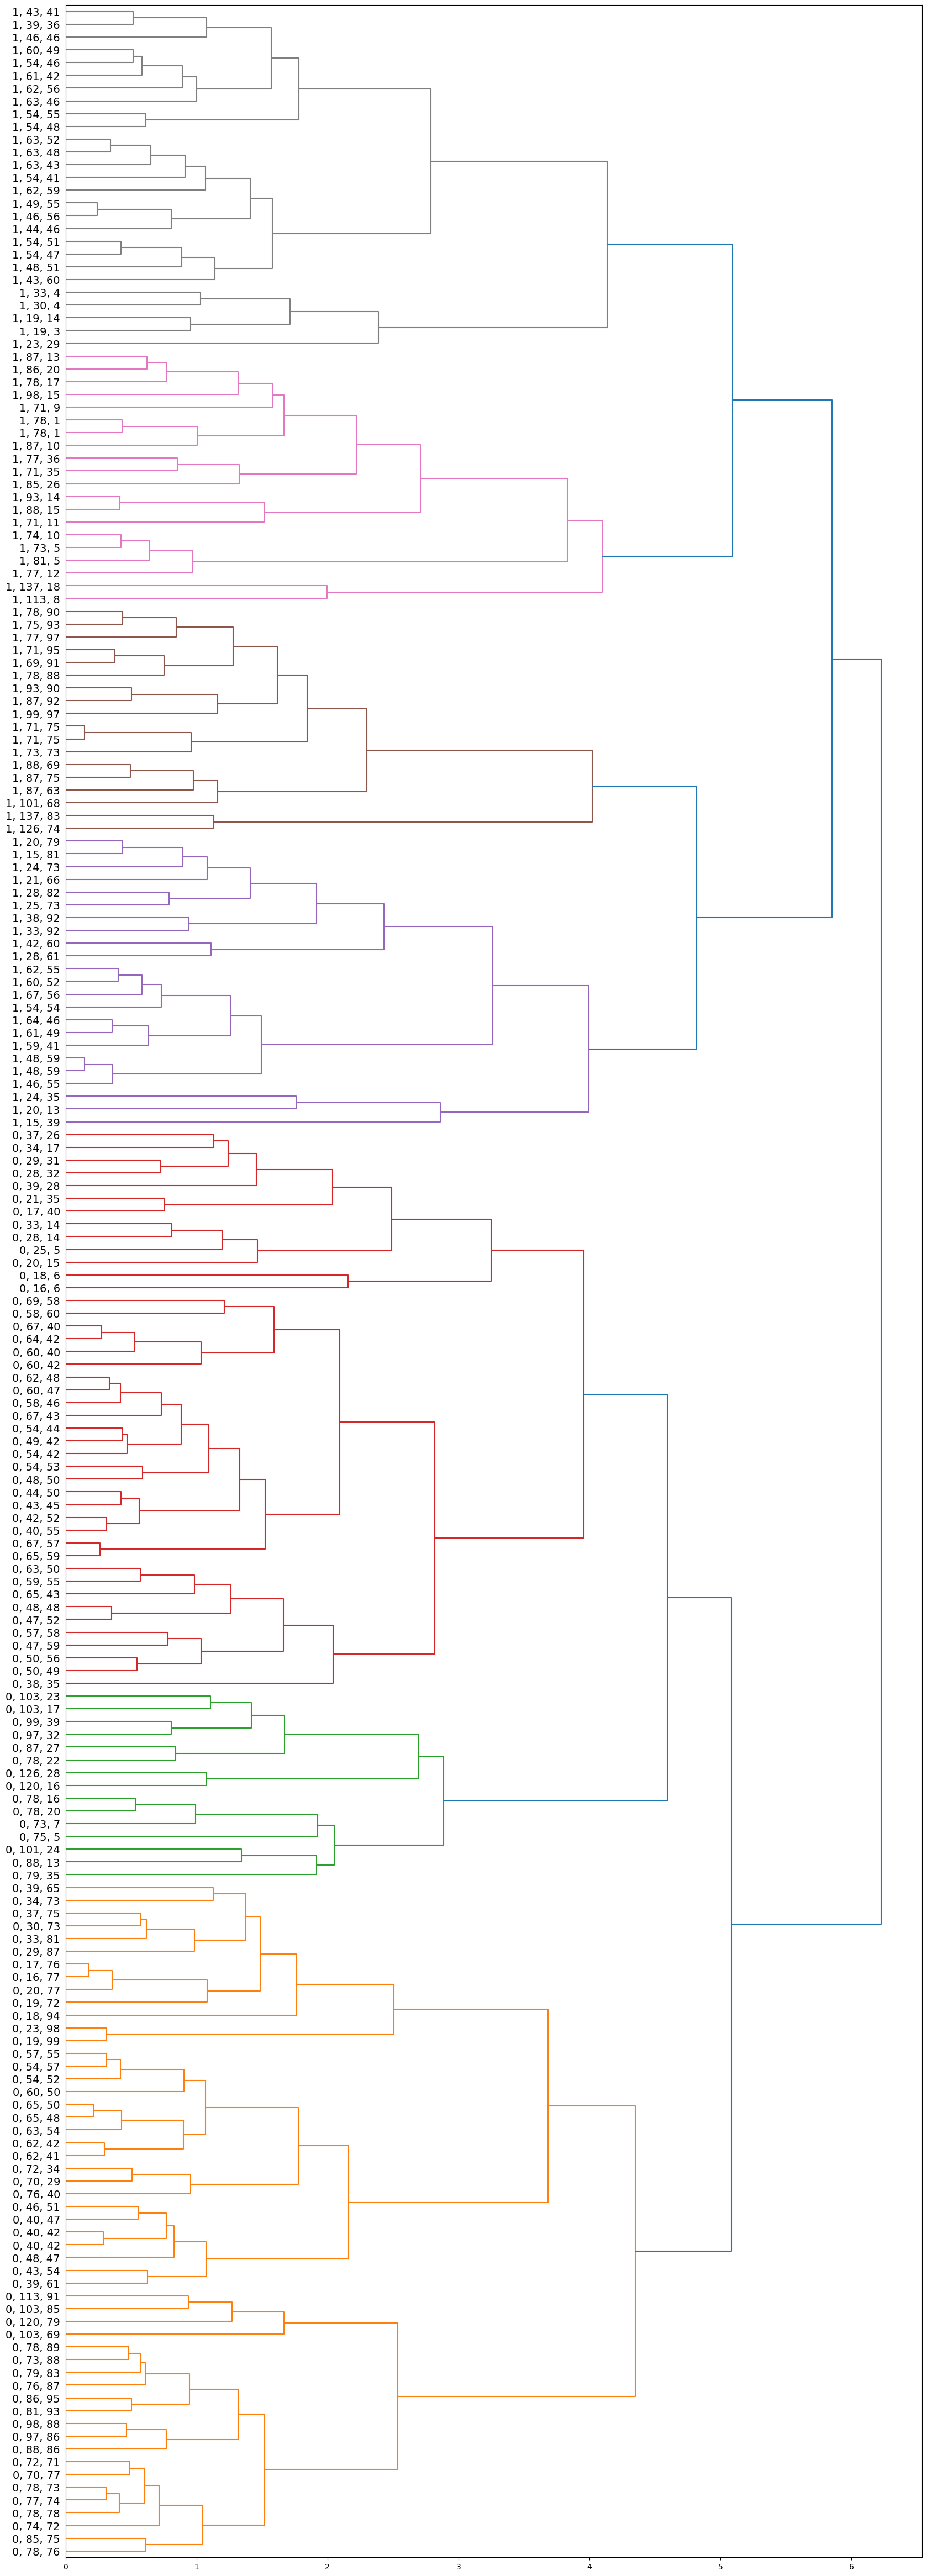

In [148]:
fig = plt.figure(figsize=(20,60))
def leaves(id):
    return f"{data['Gender'][id]}, {data['Annual Income (k$)'][id]}, {data['Spending Score (1-100)'][id]}"
dendro2 = hierarchy.dendrogram(z2, leaf_label_func=leaves, leaf_rotation=0,leaf_font_size=14, orientation='right')

In [149]:
agglom1 = AgglomerativeClustering(n_clusters = 4, metric='precomputed', linkage = 'average')
model2 = agglom1.fit(d2)
labels2 = model2.labels_
print(labels2)

[2 2 0 0 0 0 0 0 1 0 1 0 0 0 2 2 0 2 1 0 2 2 0 2 0 2 0 2 0 0 1 0 1 2 0 0 0
 0 0 0 0 2 1 0 0 0 0 0 0 0 0 2 0 1 0 1 0 1 0 1 1 2 0 0 1 2 0 0 2 0 1 0 0 0
 1 2 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 2 1 0 0 2 0 0 1 2 0 0 1 2 1 0 0 1 1 1 1
 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 3 2 3 2 3 2 0 0 3 0 0 2 3 0 0 2 0 0 3 2 3 0
 0 2 3 2 0 0 0 0 3 0 3 0 0 0 3 0 3 0 3 0 0 2 3 2 3 2 0 0 3 2 3 2 0 0 3 0 0
 2 0 2 0 0 0 0 3 0 0 0 0 2 3 2]


In [150]:
data["Cluster"] = labels2
print(data.groupby(["Cluster"]).mean())
print(data.groupby(['Cluster']).count())
print(data.groupby(['Cluster','Gender']).count())

         Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                               
0           0.0  38.098214           59.250000               51.526786
1           1.0  57.370370           48.259259               41.777778
2           1.0  28.390244           60.243902               69.756098
3           1.0  39.500000           85.150000               14.050000
         Gender  Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                         
0           112  112                 112                     112
1            27   27                  27                      27
2            41   41                  41                      41
3            20   20                  20                      20
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster Gender                                                 
0       0       112                 112                 

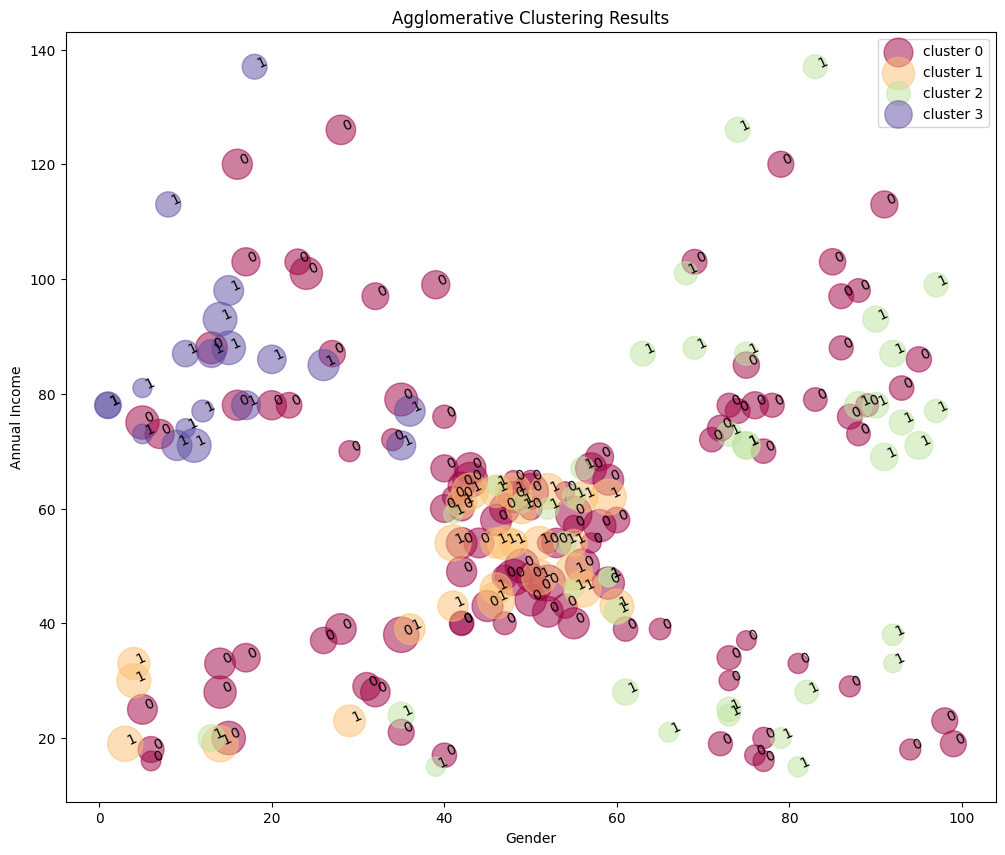

In [151]:
fig = plt.figure(figsize=(12,10))
colors2 = plt.cm.Spectral(np.linspace(0, 1, len(set(labels2))))
ax2 = fig.add_subplot(1, 1, 1)

for agg, col in zip(range(4), colors2):
    subset = data[data.Cluster == agg]
    for i in subset.index:
        plt.text(subset['Spending Score (1-100)'][i], subset['Annual Income (k$)'][i],
                 f"{subset['Gender'][i]}", rotation=25)
    plt.scatter(subset['Spending Score (1-100)'], subset['Annual Income (k$)'],
                s=subset['Age']*10,
                c=[col], label='cluster '+str(agg), alpha=0.5)

plt.legend()
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.title('Agglomerative Clustering Results')
plt.show()

The size of each data point which was supposed to be aligning with age is more or less the same for all ages, so we can use min_max scaler to scale age and emphasize the size difference:

In [152]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler(feature_range=(100,1000))
scaled_size = minmaxscaler.fit_transform(data[['Age']])
data['scaled age'] = scaled_size

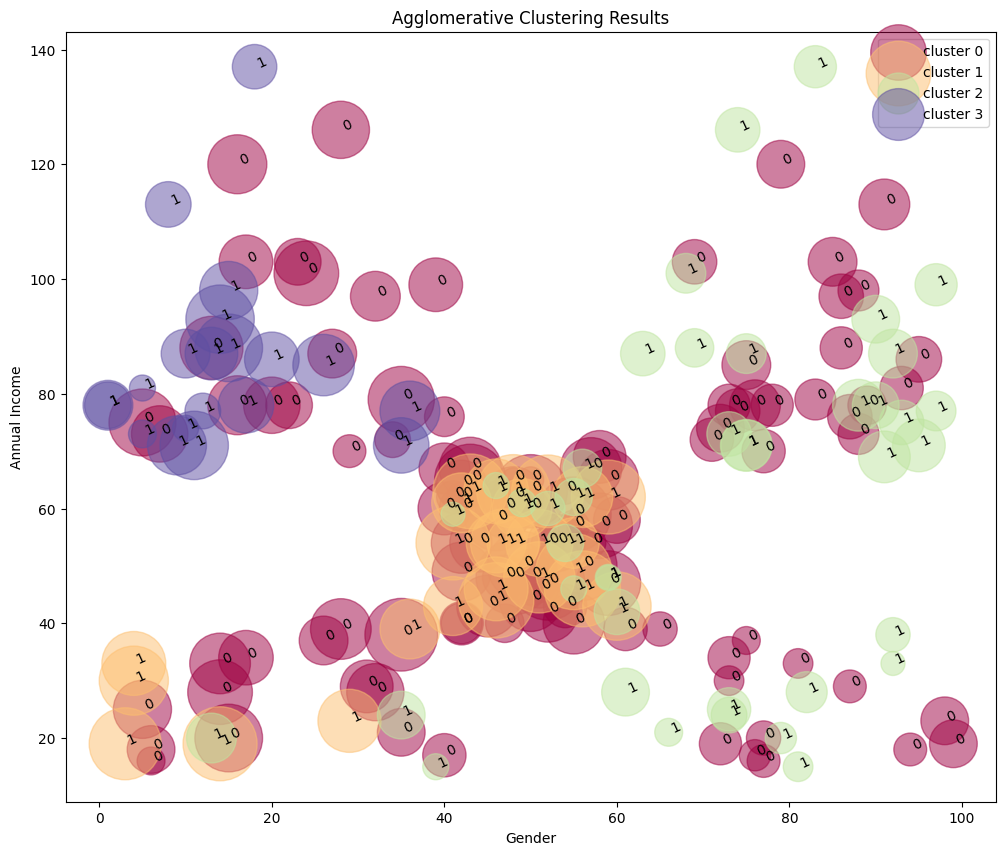

In [153]:
fig = plt.figure(figsize=(12,10))
colors2 = plt.cm.Spectral(np.linspace(0, 1, len(set(labels2))))
ax2 = fig.add_subplot(1, 1, 1)

for agg, col in zip(range(4), colors2):
    subset = data[data.Cluster == agg]
    for i in subset.index:
        plt.text(subset['Spending Score (1-100)'][i], subset['Annual Income (k$)'][i],
                 f"{subset['Gender'][i]}", rotation=25)
    plt.scatter(subset['Spending Score (1-100)'], subset['Annual Income (k$)'],
                s=subset['scaled age']*3,
                c=[col], label='cluster '+str(agg), alpha=0.5)

plt.legend()
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.title('Agglomerative Clustering Results')
plt.show()

In [154]:
categories = data.groupby(['Cluster','Gender'])[['Annual Income (k$)','Age','Spending Score (1-100)']].mean()
print(categories)

                Annual Income (k$)        Age  Spending Score (1-100)
Cluster Gender                                                       
0       0                59.250000  38.098214               51.526786
1       1                48.259259  57.370370               41.777778
2       1                60.243902  28.390244               69.756098
3       1                85.150000  39.500000               14.050000


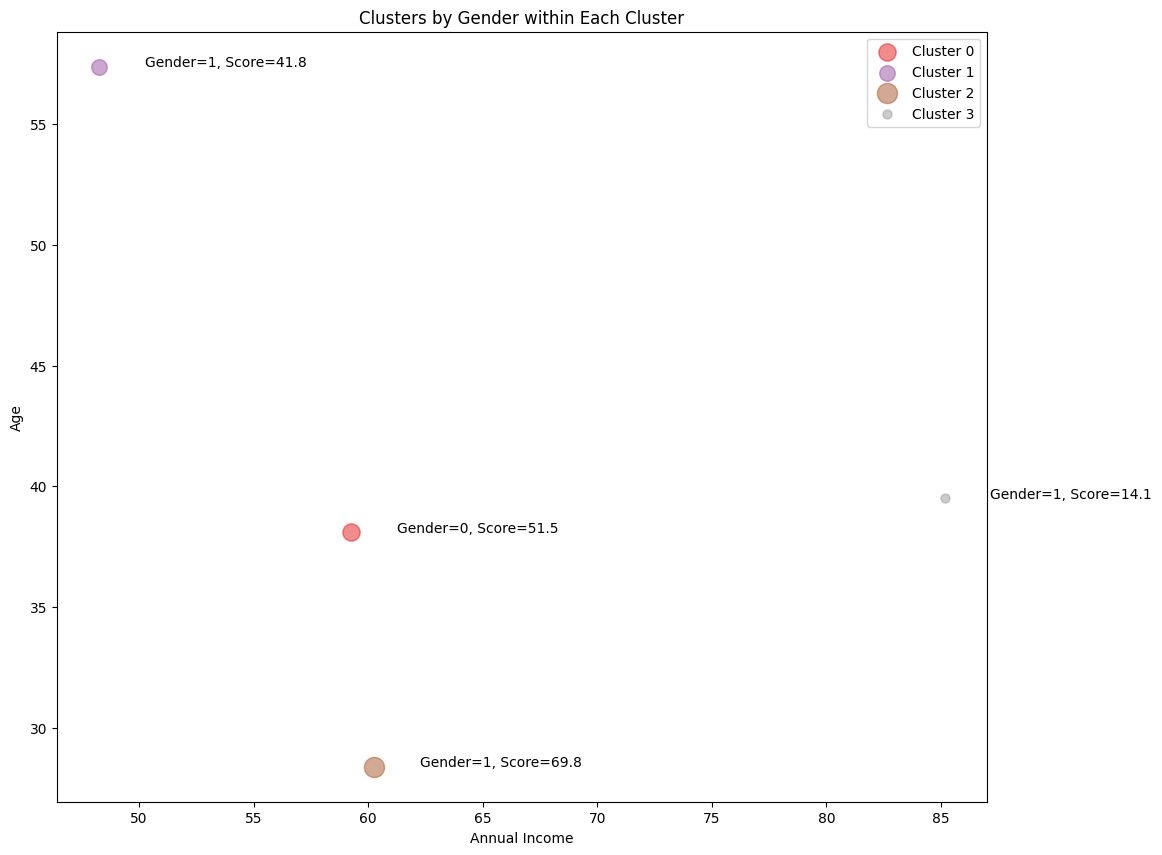

In [155]:
plt.figure(figsize=(12,10))

for label, col in zip(range(4), colors):
    subset = categories.loc[(label,),]  
    for gender in subset.index:  
        row = subset.loc[gender]  
        income = row['Annual Income (k$)']
        age = row['Age']
        score = row['Spending Score (1-100)']
        
        plt.text(income + 2, age, f"Gender={gender}, Score={score:.1f}")
        plt.scatter(income, age, s=score * 3, c=[col], label=f"Cluster {label}", alpha=0.5)

plt.legend()
plt.title('Clusters by Gender within Each Cluster')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.show()

# Time for DBSCAN:

First, I had to think of a way to decide what would be the optimum eps number, for which I used NearestNeighbor and elbow method. Let's say the number of min samples in each core is 6, so the number of neighbors for each point would be 5.

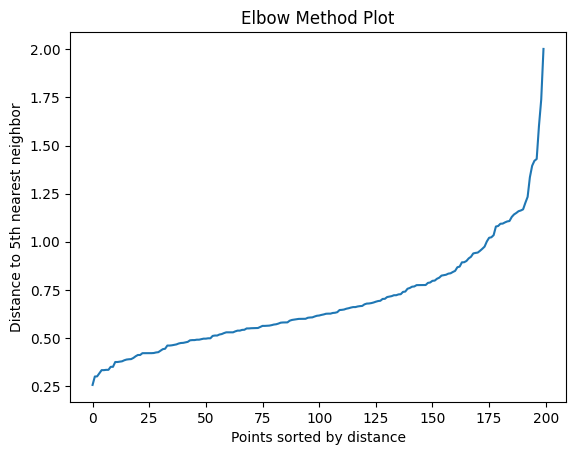

In [156]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)
distances = np.sort(distances[:, 4])  
plt.plot(distances)
plt.ylabel("Distance to 5th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title("Elbow Method Plot")
plt.show()

# So we see that the elbow point would happen at esp=1

In [157]:
db = DBSCAN(eps=1, min_samples=6)
model3 = db.fit(x)
core_samples = np.zeros_like(db.labels_, dtype=bool)
core_samples[db.core_sample_indices_] = True
labels3 = db.labels_

In [158]:
print(np.sum(core_samples))  
print(np.sum(~core_samples)) 
print(set(labels3))   

167
33
{np.int64(0), np.int64(1), np.int64(-1)}


Let's run a quick comaprison between our previous model's categorization and DBSCAN's:

In [159]:
data["DBSCAN Clusts"] = labels3
data.groupby(["DBSCAN Clusts", 'Cluster']).count()

Gender  Age  Annual Income (k$)  \
DBSCAN Clusts Cluster                                    
-1            0             2    2                   2   
              1             4    4                   4   
              2             5    5                   5   
              3             2    2                   2   
 0            1            23   23                  23   
              2            36   36                  36   
              3            18   18                  18   
 1            0           110  110                 110   

                       Spending Score (1-100)  scaled age  
DBSCAN Clusts Cluster                                      
-1            0                             2           2  
              1                             4           4  
              2                             5           5  
              3                             2           2  
 0            1                            23          23  
              2                            36          36  
              3                            18          18  
 1            0                           110         110

In [160]:
ActualClusts = len(set(labels3)) - (1 if -1 in labels3 else 0)
print(ActualClusts)
AllClusts = sorted(set(labels3))
print(AllClusts)

2
[np.int64(-1), np.int64(0), np.int64(1)]


Now let's calculate the centriods which would be the mean of the points in each cluster(exclusing the noise):

In [161]:
centroids = []
for clust_num in set(labels3):
    if clust_num == -1:
        continue  
    cluster_points = x[data["DBSCAN Clusts"] == clust_num]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)
    print(f"Cluster {clust_num} centroid:\n{centroid}")

Cluster 0 centroid:
[1.12815215 0.04618233 0.06933948 0.05475353]
Cluster 1 centroid:
[-0.88640526 -0.04664835 -0.05815633  0.07587851]


#  Time to visaulize cores, centroids and noise. Since we've used 4 different kind of features, for plotting we will need to use PCA to reduce the dimensiond from 4 to 2:

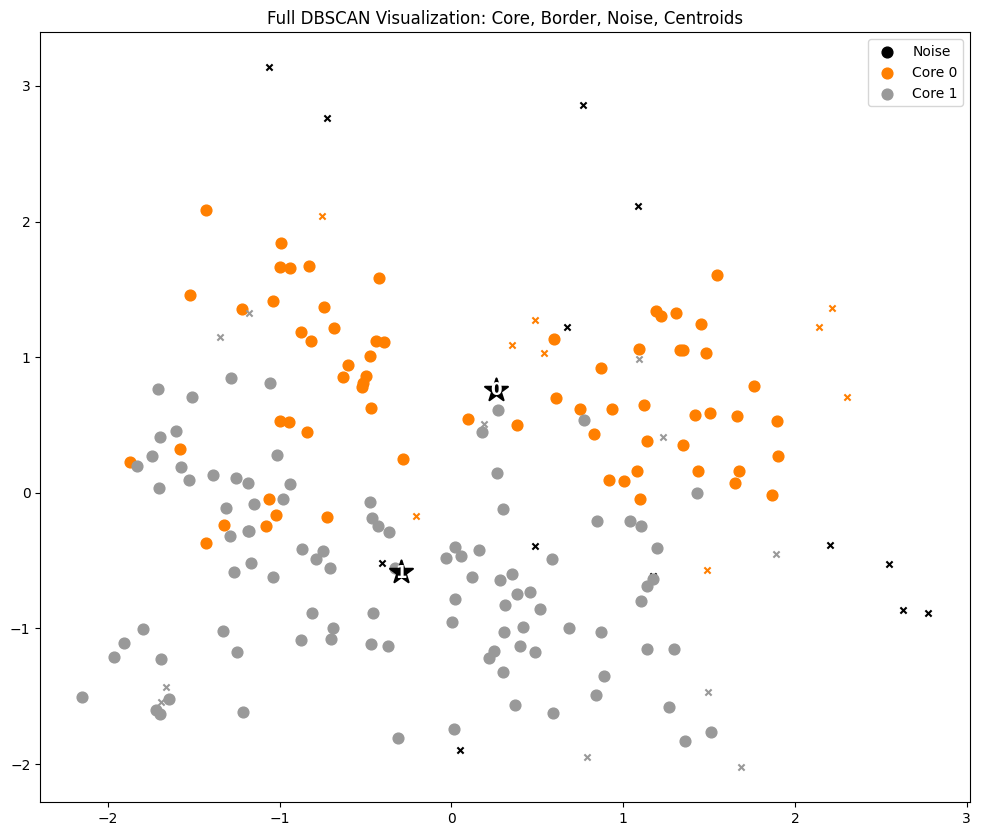

In [162]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_paced = pca.fit_transform(x)
centroids_paced = pca.transform(centroids)
colors3 = plt.cm.Set1(np.linspace(0, 1, len(AllClusts)))
fig3 = plt.figure(figsize=(12,10))
for l, j in zip(AllClusts, colors3):
    if l == -1:
        j = [0, 0, 0, 1]
    clust_members = (labels3 == l)
    xy = x_paced[clust_members & core_samples]
    plt.scatter(xy[:, 0], xy[:, 1], s=60, c=[j], marker='o', label=f'Core {l}' if l != -1 else 'Noise')
    xy = x_paced[clust_members & ~core_samples]
    plt.scatter(xy[:, 0], xy[:, 1], s=20, c=[j], marker='x')
for i, c in enumerate(centroids_paced):
    plt.scatter(c[0], c[1], color='black', marker='*', s=300, edgecolor='black', linewidth=1.5)
    plt.text(c[0], c[1], str(i), color='white', fontsize=12, ha='center', va='center', weight='bold')

plt.title("Full DBSCAN Visualization: Core, Border, Noise, Centroids")
plt.legend()
plt.show()